## Exploratory Data Analysis

Here we will analyse our cleaned data to understand how the factors are related to gain deeper insights from our existing data at hand.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
#Input - 12 other features (fouls, shots, goals, misses,corners, red card, yellow cards)
#Output - Full Time Result (H=Home Win, D=Draw, A=Away Win) 

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('epl_train.csv')

display(data.head())

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,B365H,B365D,B365A,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2009-08-15,Aston Villa,Wigan,0,2,A,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.67,3.60,5.50,6.0,16.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0
1,1,2009-08-15,Blackburn,Man City,0,2,A,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.60,3.25,2.10,10.0,5.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
2,2,2009-08-15,Bolton,Sunderland,0,1,A,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,2.25,3.25,3.25,14.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
3,3,2009-08-15,Chelsea,Hull,2,1,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.17,6.50,21.00,1.0,19.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-18.0
4,4,2009-08-15,Everton,Arsenal,1,6,A,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.20,3.25,2.30,8.0,3.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0


### Legend for the Table

- Date = Match Date (yyyy/mm/dd)
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTGS = Home Team Goals Scored
- ATGS = Away Team Goals Scored
- HTGC = Home Team Goals Conceded
- ATGC = Away Team Goals Conceded
- HTP = Home Team Points
- ATP = Away Team Points 
- HM(1-5) = Home Team Form (Prev 5 Matches)
- AM(1-5) = Home Team Form (Prev 5 Matches)
- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- B365A = Bet365 away win odds
- HomeTeamLP = Home Team League Position
- AwayTeamLP = Away Team League Position
- MW = Matchweek
- HTGD - Home team goal difference
- ATGD - away team goal difference
- DiffFormPts = Diff in points
- DiffLP - Differnece in last years prediction

In [4]:
#Finding out the win rate for Home Team & Away Team

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])
n_awaywins = len(data[data.FTR == 'A'])

# Calculate win rate for home team.
homewin_rate = (float(n_homewins) / (n_matches)) * 100
awaywin_rate = (float(n_awaywins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(homewin_rate))
print("Number of matches won by away team: {}".format(n_awaywins))
print("Win rate of away team: {:.2f}%".format(awaywin_rate))

Total number of matches: 4179
Number of features: 45
Number of matches won by home team: 1930
Win rate of home team: 46.18%
Number of matches won by away team: 1218
Win rate of away team: 29.15%


In [5]:
cleanup_nums = {"FTR":     {"H": 2, "D": 1, "A": 0}}
obj_df = data.replace(cleanup_nums)
obj_df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,B365H,B365D,B365A,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2009-08-15,Aston Villa,Wigan,0,2,0,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.67,3.60,5.50,6.0,16.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0
1,1,2009-08-15,Blackburn,Man City,0,2,0,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.60,3.25,2.10,10.0,5.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
2,2,2009-08-15,Bolton,Sunderland,0,1,0,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,2.25,3.25,3.25,14.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
3,3,2009-08-15,Chelsea,Hull,2,1,2,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.17,6.50,21.00,1.0,19.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-18.0
4,4,2009-08-15,Everton,Arsenal,1,6,0,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.20,3.25,2.30,8.0,3.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0


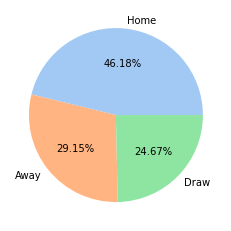

Text(0, 0.5, 'Count')

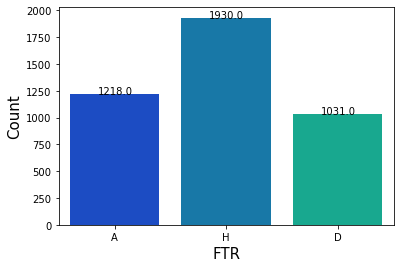

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


#define data
pie_data = obj_df[['FTR']]
keys = ['Home','Away','Draw']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
df1 = pd.DataFrame(data['FTR'].value_counts().reset_index())
plt.pie(data = df1 ,x='FTR',labels= keys,colors = colors, autopct='%.2f%%')
plt.show()
ax = sns.countplot(data=data,x="FTR",palette="winter",)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

-> As seen above, the Home Team has the highest win percentage. 

-> This might be because while playing at home, the crowd would be cheering for the home team improving morale and allowing them to perform better. They are more familiar with the environment. As such this plays a significant role in predicting outcomes

                 HTGD      ATGD       HTP       ATP  DiffFormPts    DiffLP
HTGD         1.000000 -0.002352  0.836172  0.003416     0.476391 -0.545310
ATGD        -0.002352  1.000000 -0.001609  0.834710    -0.476546  0.557349
HTP          0.836172 -0.001609  1.000000  0.193032     0.479287 -0.493135
ATP          0.003416  0.834710  0.193032  1.000000    -0.475523  0.504920
DiffFormPts  0.476391 -0.476546  0.479287 -0.475523     1.000000 -0.479126
DiffLP      -0.545310  0.557349 -0.493135  0.504920    -0.479126  1.000000


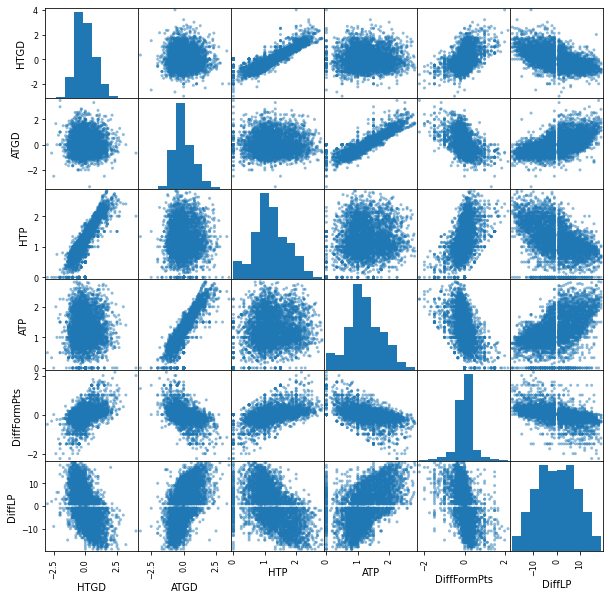

In [7]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference = HTGS - HTGC
#ATGD - away team goal difference = ATGS - ATGC
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))
numericdata = pd.DataFrame(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']])
print(numericdata.corr())

In [8]:
obj_df.describe()

,Unnamed: 0,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,B365H,B365D,B365A,HomeTeamLP,AwayTeamLP,MW,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
count,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000
mean,2089.000000,1.565686,1.182340,1.170376,25.357980,25.441493,25.452022,25.280689,1.211831,1.226426,2.843592,4.128330,5.039737,10.530510,10.530270,19.495573,6.238574,6.436468,0.062934,0.020340,0.055516,0.014836,0.067480,0.019861,0.056951,0.011007,-0.010093,0.010769,-0.014594,-0.014354,0.000239
std,1206.517716,1.315911,1.164442,0.851138,18.206928,18.111104,16.890711,16.824864,0.547076,0.546507,2.062510,1.290025,4.356126,5.774833,5.774586,10.964745,3.596683,3.600632,0.242873,0.141177,0.229011,0.120911,0.250882,0.139540,0.231778,0.104350,0.754429,0.754024,0.694648,0.413034,8.377593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,3.000000,1.120000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.333333,-2.250000,-2.250000,-19.000000
25%,1044.500000,1.000000,0.000000,0.000000,11.000000,11.000000,12.000000,11.000000,0.877500,0.891892,1.650000,3.400000,2.400000,5.500000,5.500000,10.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.521739,-0.500000,-0.454545,-0.173913,-6.000000
50%,2089.000000,1.000000,1.000000,1.000000,23.000000,23.000000,24.000000,24.000000,1.161290,1.176471,2.200000,3.600000,3.500000,11.000000,11.000000,19.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.114286,-0.090909,0.000000,0.000000,0.000000
75%,3133.500000,2.000000,2.000000,2.000000,36.000000,36.000000,37.000000,37.000000,1.578947,1.600000,3.100000,4.330000,5.750000,16.000000,16.000000,29.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.500000,0.445906,0.150000,6.000000
max,4178.000000,9.000000,9.000000,2.000000,102.000000,105.000000,83.000000,79.000000,2.821429,2.821429,23.000000,17.000000,41.000000,20.000000,20.000000,38.000000,15.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.500000,2.285714,2.166667,19.000000


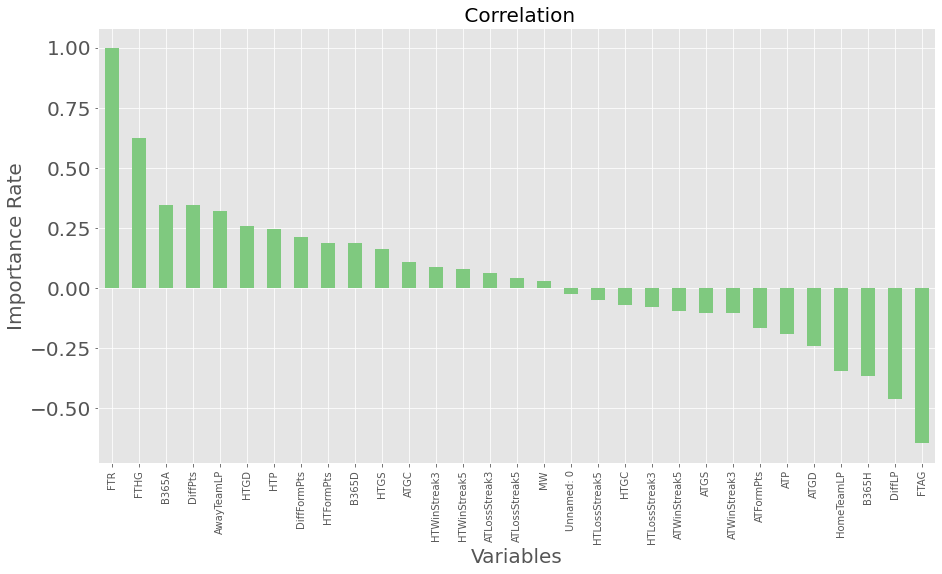

Most Positive Correlations: 
 FTR           1.000000
FTHG          0.625123
B365A         0.347261
DiffPts       0.344351
AwayTeamLP    0.320990
Name: FTR, dtype: float64

Most Negative Correlations: 
 ATGD         -0.241950
HomeTeamLP   -0.345971
B365H        -0.364458
DiffLP       -0.459739
FTAG         -0.645241
Name: FTR, dtype: float64


In [9]:
import matplotlib.pyplot as plt

import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = obj_df.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

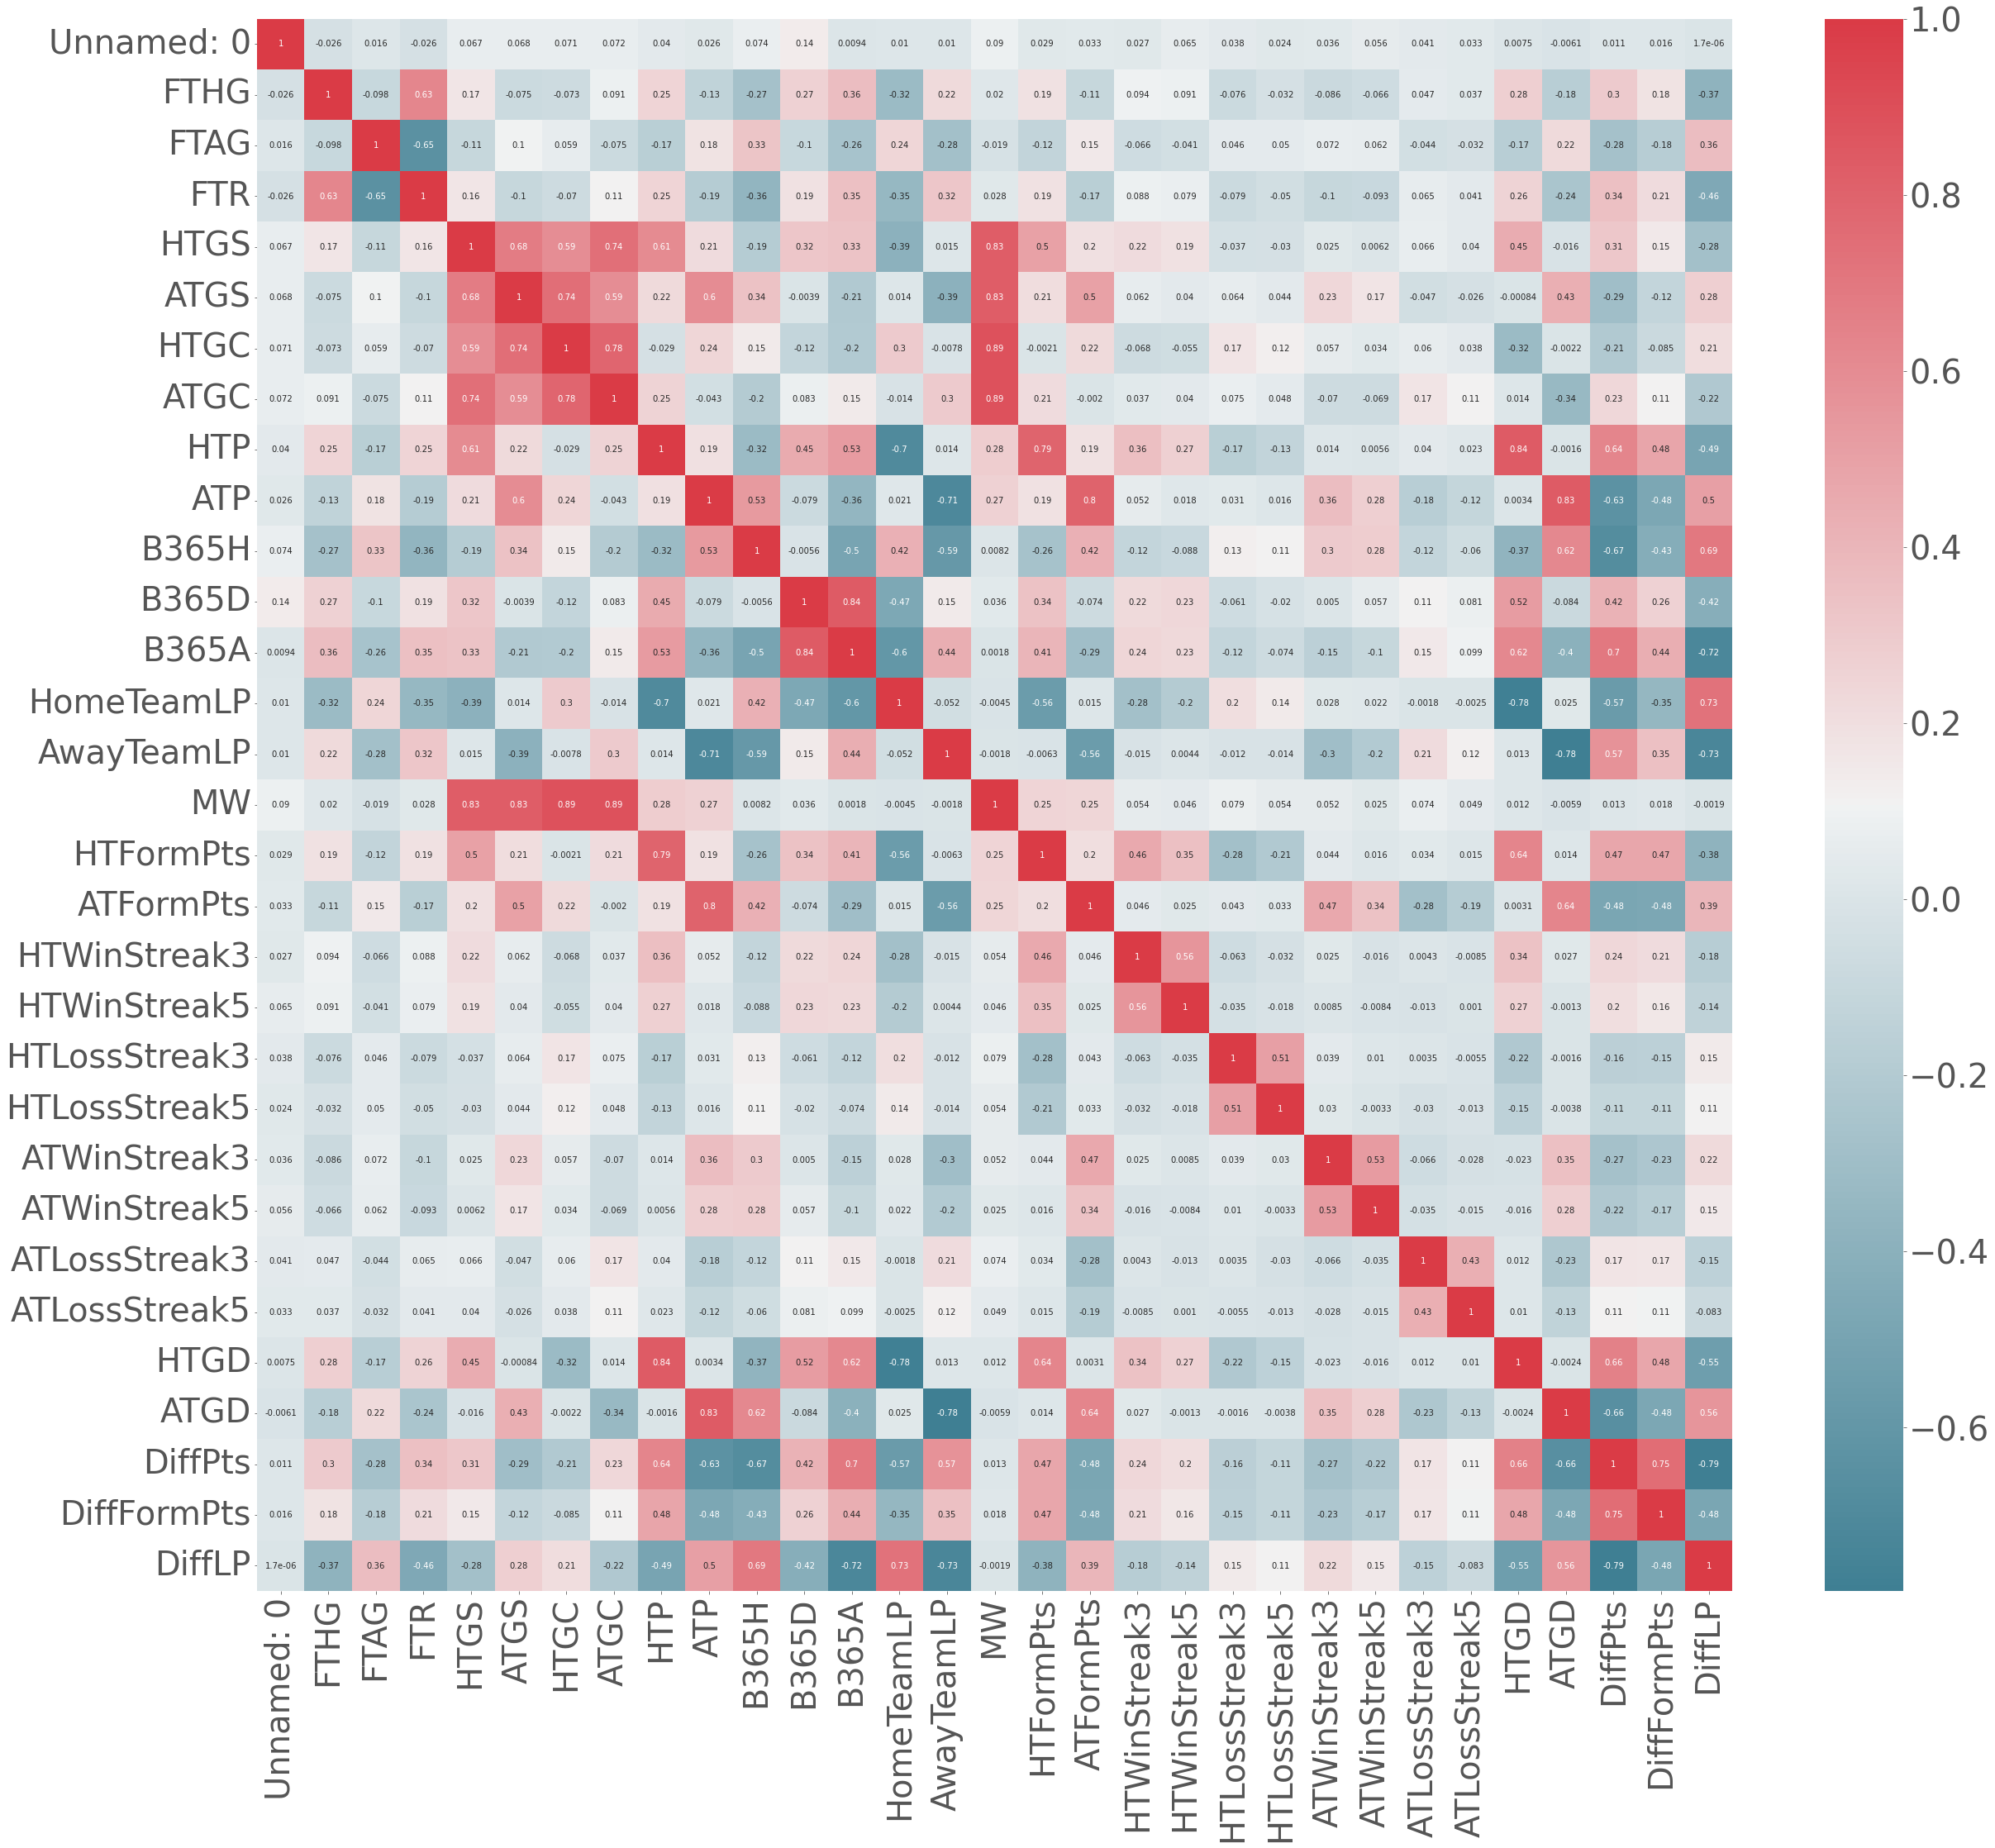

In [10]:
import seaborn as sns
cor = obj_df.corr()
plt.figure(figsize=(40,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=True, cmap=cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=40)

plt.show()

### Additional Exploratory Data Analysis

Since we will be exploring the factors of a match available to us before the match itself, we will focus our analysis on those factors. This are the factors we will be using to train our machine learning model to obtain an output.


In [11]:
data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)
data = data.replace(cleanup_nums)

In [12]:
data.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,B365H,B365D,B365A,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,0.0,0.0,M,M,M,M,M,M,1.67,3.60,5.50,0.0,0.0,0.0,0.0,-10.0
1,0,0.0,0.0,M,M,M,M,M,M,3.60,3.25,2.10,0.0,0.0,0.0,0.0,5.0
2,0,0.0,0.0,M,M,M,M,M,M,2.25,3.25,3.25,0.0,0.0,0.0,0.0,1.0
3,2,0.0,0.0,M,M,M,M,M,M,1.17,6.50,21.00,0.0,0.0,0.0,0.0,-18.0
4,0,0.0,0.0,M,M,M,M,M,M,3.20,3.25,2.30,0.0,0.0,0.0,0.0,5.0


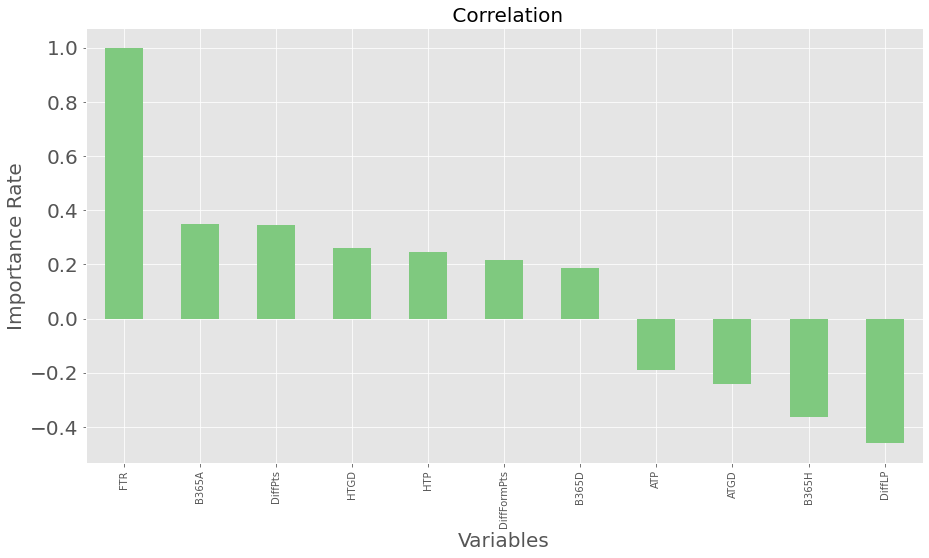

Most Positive Correlations: 
 FTR        1.000000
B365A      0.347261
DiffPts    0.344351
HTGD       0.258612
HTP        0.246913
Name: FTR, dtype: float64

Most Negative Correlations: 
 B365D     0.187579
ATP      -0.190524
ATGD     -0.241950
B365H    -0.364458
DiffLP   -0.459739
Name: FTR, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = data.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

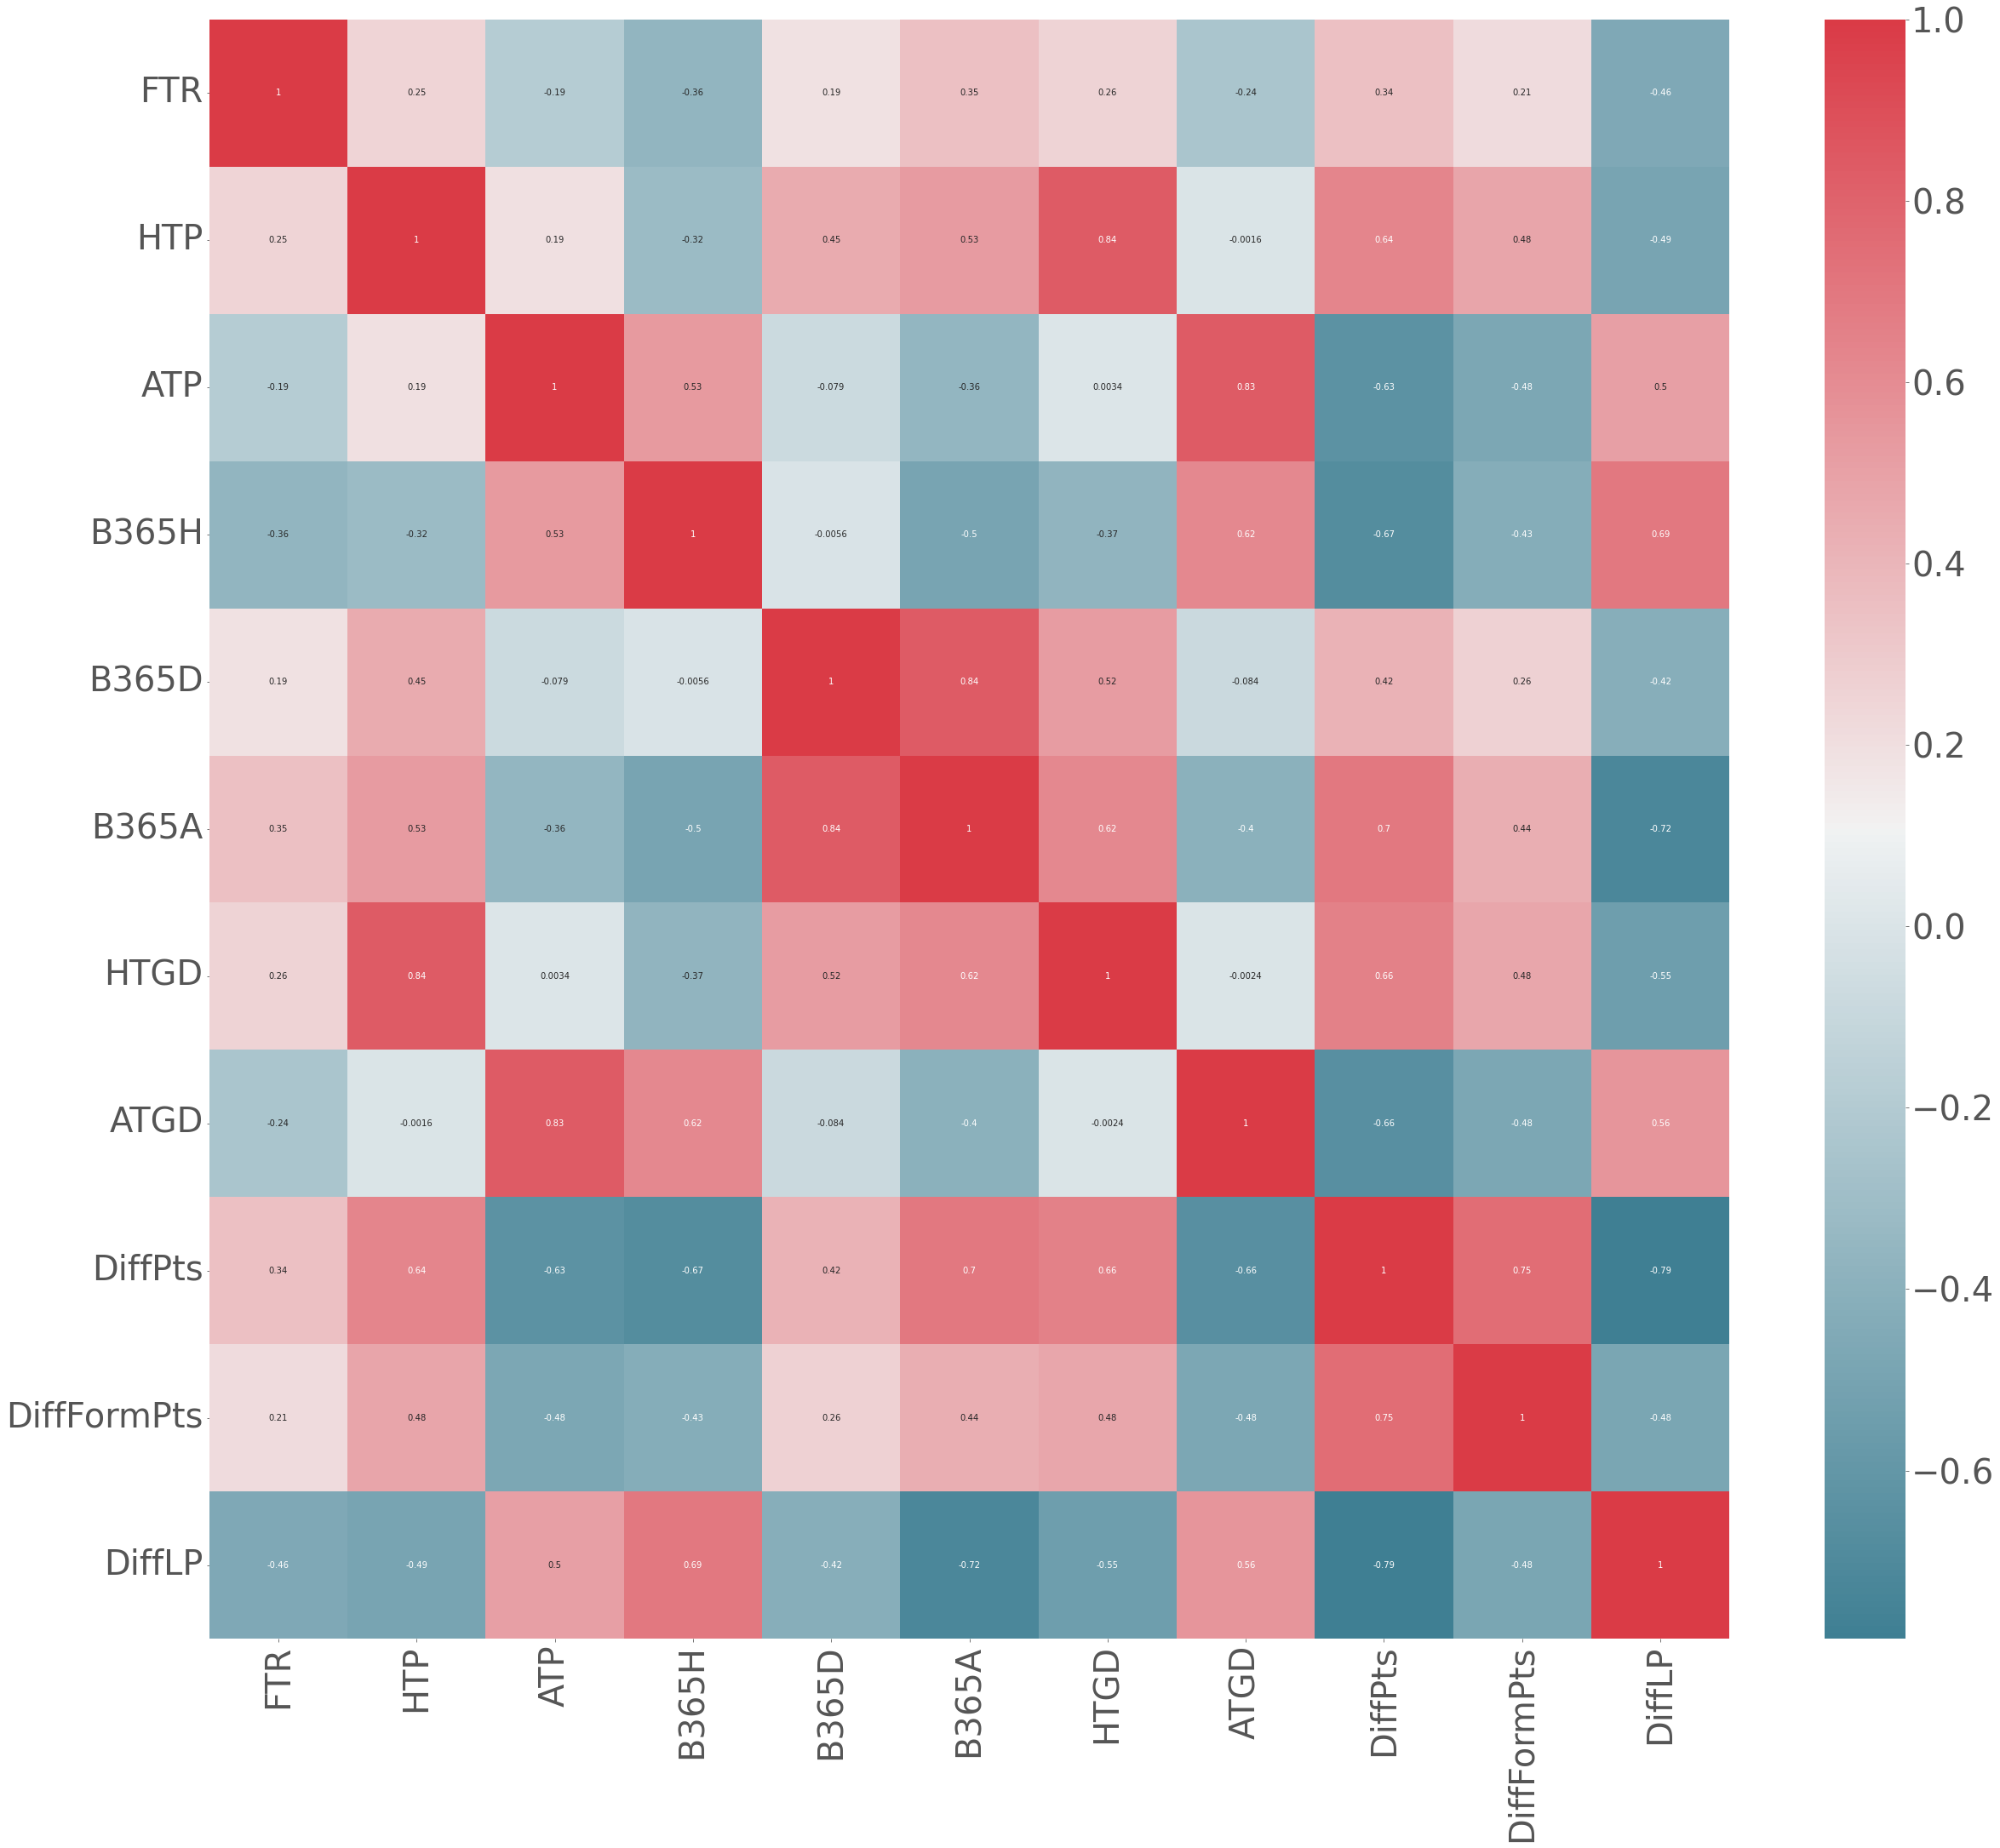

In [14]:
import seaborn as sns
cor = data.corr()
plt.figure(figsize=(40,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=True, cmap=cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=40)

plt.show()

count    4179.000000
mean        2.843592
std         2.062510
min         1.060000
25%         1.650000
50%         2.200000
75%         3.100000
max        23.000000
Name: B365H, dtype: float64

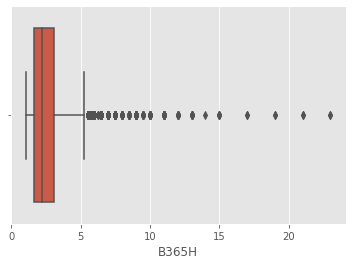

In [15]:
ax = sns.boxplot(x=data['B365H'])
data['B365H'].describe()

count    4179.000000
mean        4.128330
std         1.290025
min         3.000000
25%         3.400000
50%         3.600000
75%         4.330000
max        17.000000
Name: B365D, dtype: float64

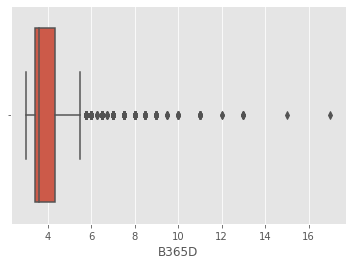

In [16]:
ax = sns.boxplot(x=data['B365D'])
data['B365D'].describe()

count    4179.000000
mean        5.039737
std         4.356126
min         1.120000
25%         2.400000
50%         3.500000
75%         5.750000
max        41.000000
Name: B365A, dtype: float64

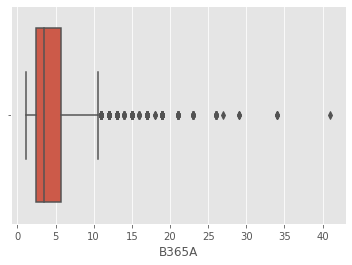

In [17]:
ax = sns.boxplot(x=data['B365A'])
data['B365A'].describe()